In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cleaning data

### Raed Files

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/DataProject/data.csv')

In [ ]:
data_Weather = pd.read_csv('/content/drive/MyDrive/DataProject/weather.csv')

In [ ]:
#The average temperature in each retail region over time. 
series_1=data_Weather['Temperature']
print('The Average for all Stores : ',series_1.mean())
print("------------------------------------------------------")
calculate_mean=data_Weather.drop(columns=['Date'])
m = calculate_mean.groupby('Store').mean()
display(m)

The Average for all Stores :  59.356197802197805
------------------------------------------------------


,Temperature
Store,
1,66.912033
2,66.728407
3,70.394176
4,61.416648
5,68.224505
6,68.504670
7,37.921264
8,61.180220
9,66.269505


In [ ]:
data_fuel = pd.read_csv('/content/drive/MyDrive/DataProject/fuel pricing.csv')

##	Examine all datasets with Pandas


1-The fitst data

In [ ]:
#Display the dataset
display(data)

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
#display the datatype for each column
display(data.dtypes)

Store             int64
Category          int64
Date             object
Weekly_Sales    float64
Holiday            bool
dtype: object

In [ ]:
#print the top 10 in dataset
data.head(10)

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [ ]:
# calculate (Count, mean, std, min, max). 
numric_data=data.select_dtypes(['int','float'])
display(numric_data.agg(['count','mean','std','min','max']))

,Store,Category,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
max,45.000000,99.000000,693099.360000


In [ ]:
#the missing data
data.isna().sum()

Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
dtype: int64

In [ ]:
#the incorrect values in each column
neg_data=data.loc[data.Weekly_Sales <=0]
display(neg_data)
#there is 1358 row is incorrect in more than 400000 row , we can drop it

,Store,Category,Date,Weekly_Sales,Holiday
846,1,6,2012-08-10,-139.65,False
2384,1,18,2012-05-04,-1.27,False
6048,1,47,2010-02-19,-863.00,False
6049,1,47,2010-03-12,-698.00,False
6051,1,47,2010-10-08,-58.00,False
...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True
419598,45,80,2010-02-19,-0.27,False
419603,45,80,2010-04-16,-1.61,False
419614,45,80,2010-07-02,-0.27,False


In [ ]:
data.drop(neg_data.index,axis=0,inplace=True)
display(data.shape)

(420212, 5)

In [ ]:
data.loc[data.Weekly_Sales <=0]

,Store,Category,Date,Weekly_Sales,Holiday


In [ ]:
#duplicated_data
data.loc[data.duplicated(['Store', 'Category','Date'])]

,Store,Category,Date,Weekly_Sales,Holiday


In [ ]:
#mapping the Holiday Values to 0 or 1

def mapping_holiday(b):
  if b == False:
    return 0
  else:
    return 1

In [ ]:
data['Holiday']=data['Holiday'].map(mapping_holiday)
data.head()

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0


------------------------------------------------------

2-The second data

In [ ]:
#Display the dataset
display(data_Weather)

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
...,...,...,...
8185,45,2013-06-28,76.05
8186,45,2013-07-05,77.50
8187,45,2013-07-12,79.37
8188,45,2013-07-19,82.84


In [ ]:
#display the datatype for each column
display(data_Weather.dtypes)

Store            int64
Date            object
Temperature    float64
dtype: object

In [ ]:
#print the top 10 in dataset
data_Weather.head(10)

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
5,1,2010-03-12,57.79
6,1,2010-03-19,54.58
7,1,2010-03-26,51.45
8,1,2010-04-02,62.27
9,1,2010-04-09,65.86


In [ ]:
# calculate (Count, mean, std, min, max). 
numric_data_Weahter=data_Weather.select_dtypes(['int','float'])
display(numric_data_Weahter.agg(['count','mean','std','min','max']))

,Store,Temperature
count,8190.000000,8190.000000
mean,23.000000,59.356198
std,12.987966,18.678607
min,1.000000,-7.290000
max,45.000000,101.950000


In [ ]:
#the missing data
data_Weather.isna().sum()

Store          0
Date           0
Temperature    0
dtype: int64

In [ ]:
#duplicated_data
data_Weather.loc[data_Weather.duplicated(['Store', 'Date'])]

,Store,Date,Temperature


3-The third data

In [ ]:
#Display the dataset
display(data_fuel)

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
...,...,...,...
8185,45,2013-06-28,3.639
8186,45,2013-07-05,3.614
8187,45,2013-07-12,3.614
8188,45,2013-07-19,3.737


In [ ]:
#display the datatype for each column
display(data_fuel.dtypes)

Store           int64
Date           object
Fuel_Price    float64
dtype: object

In [ ]:
#print the top 10 in dataset
data_fuel.head(10)

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
5,1,2010-03-12,2.667
6,1,2010-03-19,2.720
7,1,2010-03-26,2.732
8,1,2010-04-02,2.719
9,1,2010-04-09,2.770


In [ ]:
# calculate (Count, mean, std, min, max). 
numric_data_fuel=data_fuel.select_dtypes(['int','float'])
display(numric_data_fuel.agg(['count','mean','std','min','max']))

,Store,Fuel_Price
count,8190.000000,8190.000000
mean,23.000000,3.405992
std,12.987966,0.431337
min,1.000000,2.472000
max,45.000000,4.468000


In [ ]:
#the missing data
data_fuel.isna().sum()

Store         0
Date          0
Fuel_Price    0
dtype: int64

In [ ]:
#the incorrect values in each column
neg_data_fuel=data_fuel.loc[data_fuel.Fuel_Price <=0]
display(neg_data_fuel)

,Store,Date,Fuel_Price


In [ ]:
#duplicated_data
data_fuel.loc[data_fuel.duplicated(['Store', 'Date'])]

,Store,Date,Fuel_Price


Merged_data

In [ ]:
#Merge_data
data=data.merge(data_Weather, on=['Store', 'Date'])
data = data.merge(data_fuel, on=['Store', 'Date'])
data

,Store,Category,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price
0,1,1,2010-02-05,24924.50,0,42.31,2.572
1,1,2,2010-02-05,50605.27,0,42.31,2.572
2,1,3,2010-02-05,13740.12,0,42.31,2.572
3,1,4,2010-02-05,39954.04,0,42.31,2.572
4,1,5,2010-02-05,32229.38,0,42.31,2.572
...,...,...,...,...,...,...,...
420207,45,93,2012-10-26,2487.80,0,58.85,3.882
420208,45,94,2012-10-26,5203.31,0,58.85,3.882
420209,45,95,2012-10-26,56017.47,0,58.85,3.882
420210,45,97,2012-10-26,6817.48,0,58.85,3.882


In [ ]:
# convert string values to numbers *mapping*
from sklearn import preprocessing # labaling
lb = preprocessing.LabelEncoder()
data.Date = lb.fit_transform(data.Date)
display(data)
lst=data.Date.unique()
lst

,Store,Category,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price
0,1,1,0,24924.50,0,42.31,2.572
1,1,2,0,50605.27,0,42.31,2.572
2,1,3,0,13740.12,0,42.31,2.572
3,1,4,0,39954.04,0,42.31,2.572
4,1,5,0,32229.38,0,42.31,2.572
...,...,...,...,...,...,...,...
420207,45,93,142,2487.80,0,58.85,3.882
420208,45,94,142,5203.31,0,58.85,3.882
420209,45,95,142,56017.47,0,58.85,3.882
420210,45,97,142,6817.48,0,58.85,3.882


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142])

In [ ]:
df=data.copy()

In [ ]:
# scale *normalization*
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data[['Weekly_Sales']]= scaler.fit_transform(data[['Weekly_Sales']])
display(data)

,Store,Category,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price
0,1,1,0,0.035961,0,42.31,2.572
1,1,2,0,0.073013,0,42.31,2.572
2,1,3,0,0.019824,0,42.31,2.572
3,1,4,0,0.057645,0,42.31,2.572
4,1,5,0,0.046500,0,42.31,2.572
...,...,...,...,...,...,...,...
420207,45,93,142,0.003589,0,58.85,3.882
420208,45,94,142,0.007507,0,58.85,3.882
420209,45,95,142,0.080822,0,58.85,3.882
420210,45,97,142,0.009836,0,58.85,3.882


##** Visualization **

1.	Make a chart to illustrate if weekly sales are increasing or decreasing over time.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

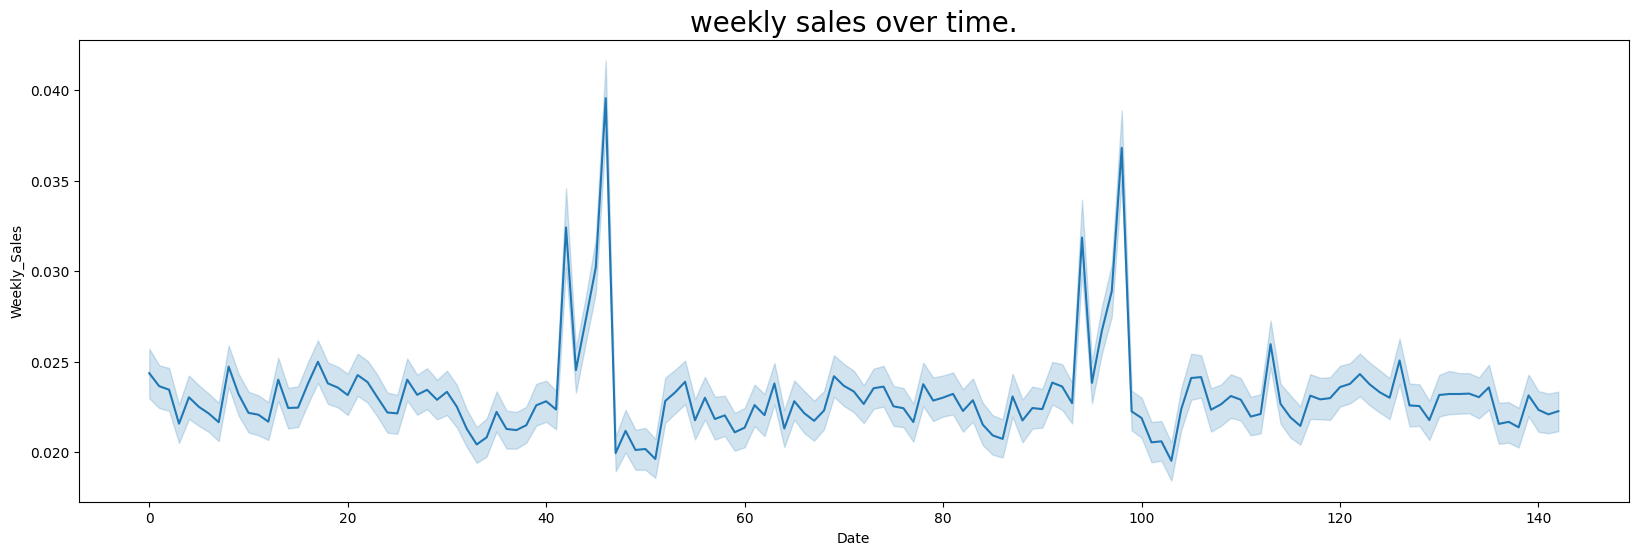

In [ ]:
plt.figure(figsize=(20,6))

#plt.plot(data['Date'],data['Weekly_Sales'],"-b",linewidth = 2)

line = sns.lineplot(x ='Date', y='Weekly_Sales', data=data)

plt.xlabel("Date")
plt.ylabel("Weekly_Sales")

plt.title('weekly sales over time.',size=20)

plt.show()


2: Make a chart to show how much each brand sells

In [ ]:
# scale *normalization*
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,100))
df[['Weekly_Sales']]= scaler.fit_transform(df[['Weekly_Sales']])
display(df)


,Store,Category,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price
0,1,1,0,4.560131,0,42.31,2.572
1,1,2,0,8.228287,0,42.31,2.572
2,1,3,0,2.962591,0,42.31,2.572
3,1,4,0,6.706900,0,42.31,2.572
4,1,5,0,5.603536,0,42.31,2.572
...,...,...,...,...,...,...,...
420207,45,93,142,1.355348,0,58.85,3.882
420208,45,94,142,1.743222,0,58.85,3.882
420209,45,95,142,9.001347,0,58.85,3.882
420210,45,97,142,1.973785,0,58.85,3.882


    Store  Weekly_Sales
0       1  41993.826339
1       2  49549.368418
2       3  17251.654411
3       4  53053.032762
4       5  15473.644474
5       6  42149.916077
6       7  21393.385977
7       8  28444.826199
8       9  19945.418040
9      10  49057.867394
10     11  37738.212643
11     12  30275.052428
12     13  51382.253693
13     14  51285.048343
14     15  22585.713285
15     16  20009.571000
16     17  28064.110680
17     18  31961.214991
18     19  39629.423843
19     20  53224.153766
20     21  24987.423730
21     22  30653.941751
22     23  38407.165098
23     24  37922.669124
24     25  24203.322765
25     26  30329.137689
26     27  46456.099960
27     28  37133.896652
28     29  20442.810646
29     30  16097.278713
30     31  38613.316605
31     32  33998.108874
32     33  11785.847715
33     34  29953.529685
34     35  28189.291626
35     36  13826.376397
36     37  17796.878887
37     38  15229.845784
38     39  39469.951448
39     40  29696.110484
40     41  35959

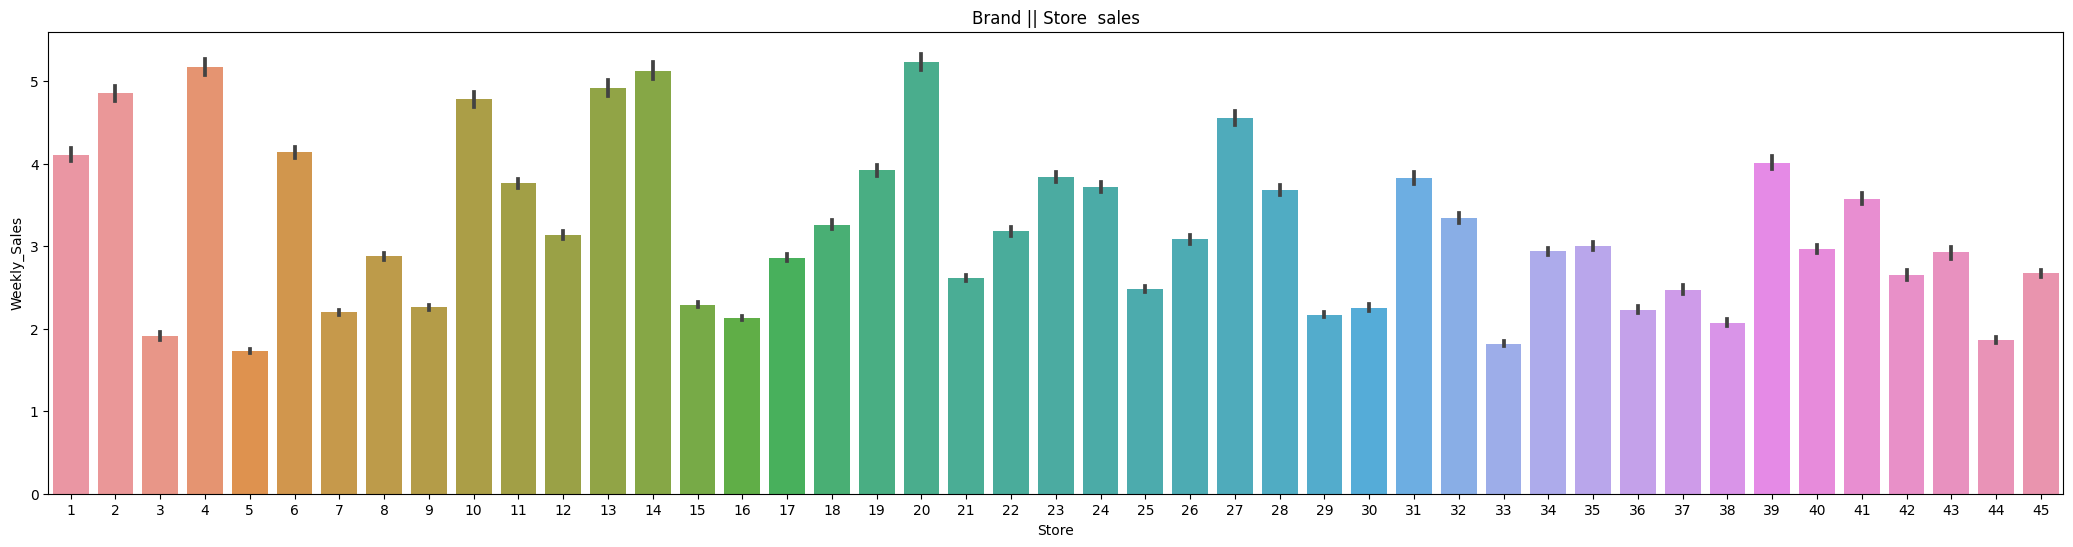

In [ ]:
#brand as Store
# Grouping all store in data  && sum sales for every one store 
brdan_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

print(brdan_sales )


# make a bar chart 
plt.figure(figsize=(26,6))

sns.barplot(x='Store', y='Weekly_Sales' ,data=df)
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")
plt.title("Brand || Store  sales")


#                 =(width , height)
plt.show()

    Category  Weekly_Sales
0          1  24095.141373
1          2  46516.555260
2          3  17275.215294
3          4  30309.674593
4          5  25715.693854
..       ...           ...
76        95  70614.384556
77        96  15378.224740
78        97  19058.376737
79        98  11496.043079
80        99    904.192775

[81 rows x 2 columns]


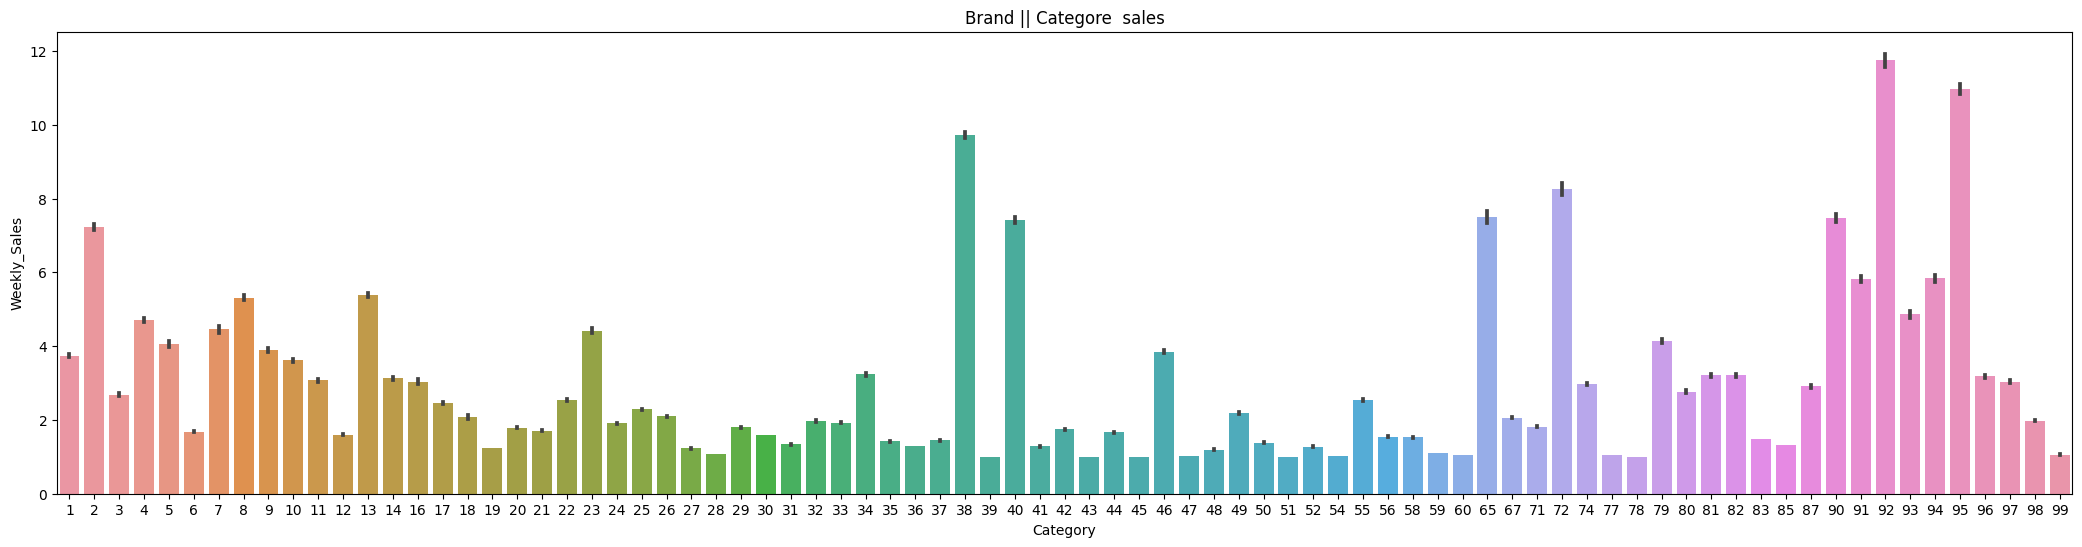

In [ ]:
#brand as Category
# Grouping all store in data  && sum sales for every one Category 
brdan_sales = df.groupby('Category')['Weekly_Sales'].sum().reset_index()

print(brdan_sales )



# make a bar chart 

#                 =(width , height)
plt.figure(figsize=(26,6))

sns.barplot(x='Category', y='Weekly_Sales' ,data=df)
plt.xlabel("Category")
plt.ylabel("Weekly_Sales")
plt.title("Brand || Categore  sales")




plt.show()

3.Determine the top ten selling stores

In [ ]:
#df = pd.DataFrame(data)
store_sales = data.groupby('Store')['Weekly_Sales'].sum().reset_index()
total_sales_df = pd.DataFrame({
    'Store': store_sales['Store'],
    'Total Sales': store_sales['Weekly_Sales']
})
top_10_stores = total_sales_df.sort_values('Total Sales', ascending=False).head(10).reset_index(drop=True)
TOP_10_STORES=(top_10_stores['Store'].values)
display(top_10_stores)

,Store,Total Sales
0,20,434.860139
1,4,432.182149
2,14,416.970185
3,13,413.386401
4,2,397.326954
5,10,391.897650
6,27,366.263636
7,6,322.837536
8,1,320.887135
9,39,299.302540


4.Make a histogram to show the top 10 stores sales

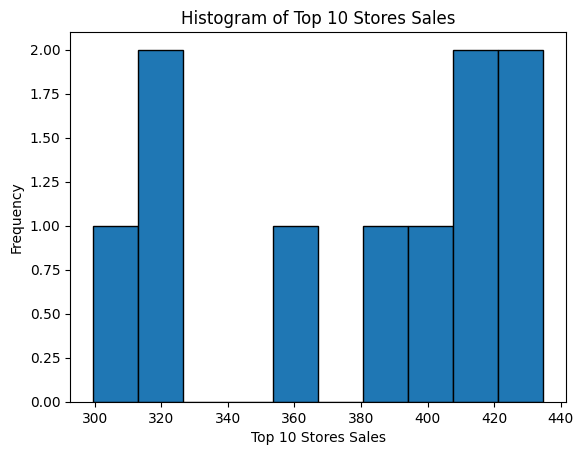

In [ ]:
plt.hist(top_10_stores['Total Sales'], bins=10, edgecolor='black')
plt.xlabel('Top 10 Stores Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Top 10 Stores Sales')
plt.show()

In [ ]:
top_10_stores =TOP_10_STORES
top_10_sales_df = data[data['Store'].isin(top_10_stores)].drop(columns=['Category','Date','Temperature','Fuel_Price'])
display(top_10_sales_df)

,Store,Weekly_Sales,Holiday
0,1,0.035961,0
1,1,0.073013,0
2,1,0.019824,0
3,1,0.057645,0
4,1,0.046500,0
...,...,...,...
369761,39,0.100523,0
369762,39,0.165539,0
369763,39,0.041679,0
369764,39,0.039089,0


5.Create a chart that compares average weekly sales for the top ten selling stores during holidays and non-holidays

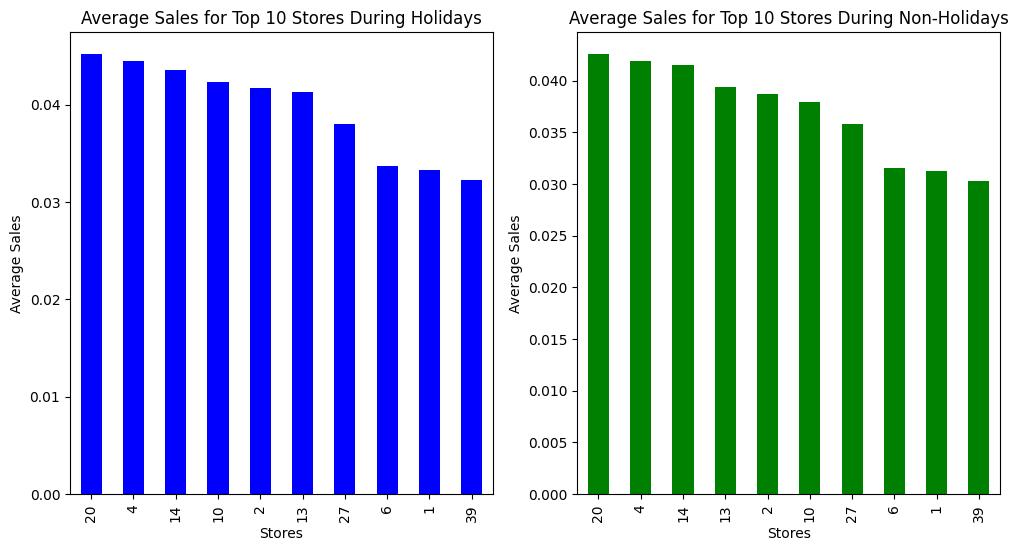

In [ ]:
sales_df = pd.DataFrame(data)

top_10_stores = TOP_10_STORES

holiday_sales = sales_df[sales_df['Store'].isin(top_10_stores) & (sales_df['Holiday'] == 1)].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False) #for avrage in holiday

non_holiday_sales = sales_df[sales_df['Store'].isin(top_10_stores) & (sales_df['Holiday'] == 0)].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False) #for avrage in non-holiday

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))#making it into 2 figures

holiday_sales.plot(kind='bar', ax=ax1, color='blue')
ax1.set_title('Average Sales for Top 10 Stores During Holidays')
ax1.set_xlabel('Stores')
ax1.set_ylabel('Average Sales')

non_holiday_sales.plot(kind='bar', ax=ax2, color='green')
ax2.set_title('Average Sales for Top 10 Stores During Non-Holidays')
ax2.set_xlabel('Stores')
ax2.set_ylabel('Average Sales')

plt.show()

6.	Create a chart that displays the average weekly sales for each brand department for the top 10 selling stores. 

In [ ]:
top_10_stores = TOP_10_STORES
top_10_sales_df = data[data['Store'].isin(top_10_stores)].drop(columns=['Category','Date','Holiday','Temperature','Fuel_Price'])

display(top_10_sales_df)


,Store,Weekly_Sales
0,1,0.035961
1,1,0.073013
2,1,0.019824
3,1,0.057645
4,1,0.046500
...,...,...
369761,39,0.100523
369762,39,0.165539
369763,39,0.041679
369764,39,0.039089


In [ ]:
sales_df = pd.DataFrame(data)
top_10_stores = TOP_10_STORES

top_10_avg_sales = sales_df[sales_df['Store'].isin(top_10_stores)].groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)#getting over all avrage

print(top_10_avg_sales)

Store
20    0.042746
4     0.042094
14    0.041676
13    0.039532
2     0.038900
10    0.038197
27    0.035922
6     0.031685
1     0.031380
39    0.030420
Name: Weekly_Sales, dtype: float64


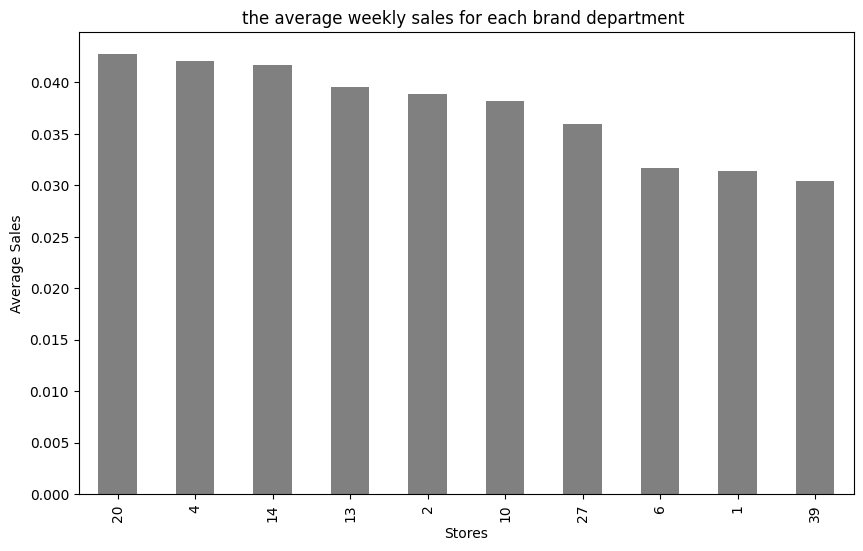

In [ ]:
plt.figure(figsize=(10, 6)) #making the figure
top_10_avg_sales.plot(kind='bar', color='gray')
plt.xlabel('Stores')
plt.ylabel('Average Sales')
plt.title('the average weekly sales for each brand department ')
plt.show()


7: Make a line chart to show the relationship between weekly sales and weather Temperature.

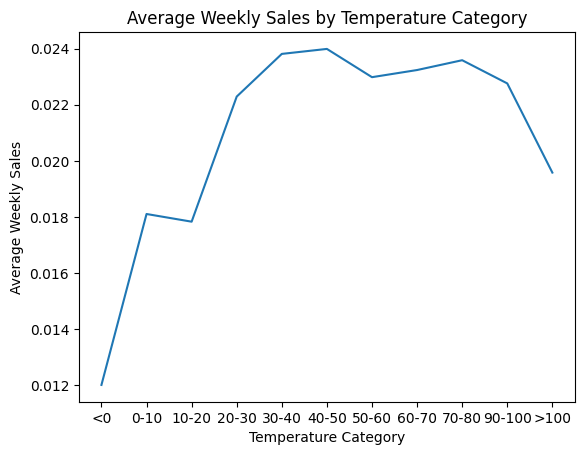

<Figure size 10000x600 with 0 Axes>

In [ ]:
#df=pd.DataFrame(data)
temperature_bins = [-10, 0, 10, 20 , 30 , 40 , 50 , 60, 70, 80 ,90,100] 
temperature_labels = ['<0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60' ,'60-70', '70-80' , '90-100','>100'] # make number use it in x-axise

# Categorize the temperature column
data['Temperature_Category'] = pd.cut(data['Temperature'], bins=temperature_bins, labels=temperature_labels)
# data['Temperature_Category'] = pd.cut(data['Temperature'], bins=temperature_bins, labels=False)
# calculate the average weekly sales temp
avg_sales_by_temperature = data.groupby('Temperature_Category')['Weekly_Sales'].mean()

# Plot 'line'  chart
#plt.plot(avg_sales_by_temperature.index, avg_sales_by_temperature.values, marker='.' , color='black' )
# sns 'line'  chart
line = sns.lineplot(x =avg_sales_by_temperature.index, y=avg_sales_by_temperature.values)

plt.title('Average Weekly Sales by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Weekly Sales')
#plt.xticks(rotation=45)
plt.figure(figsize=(100,6))

plt.show()

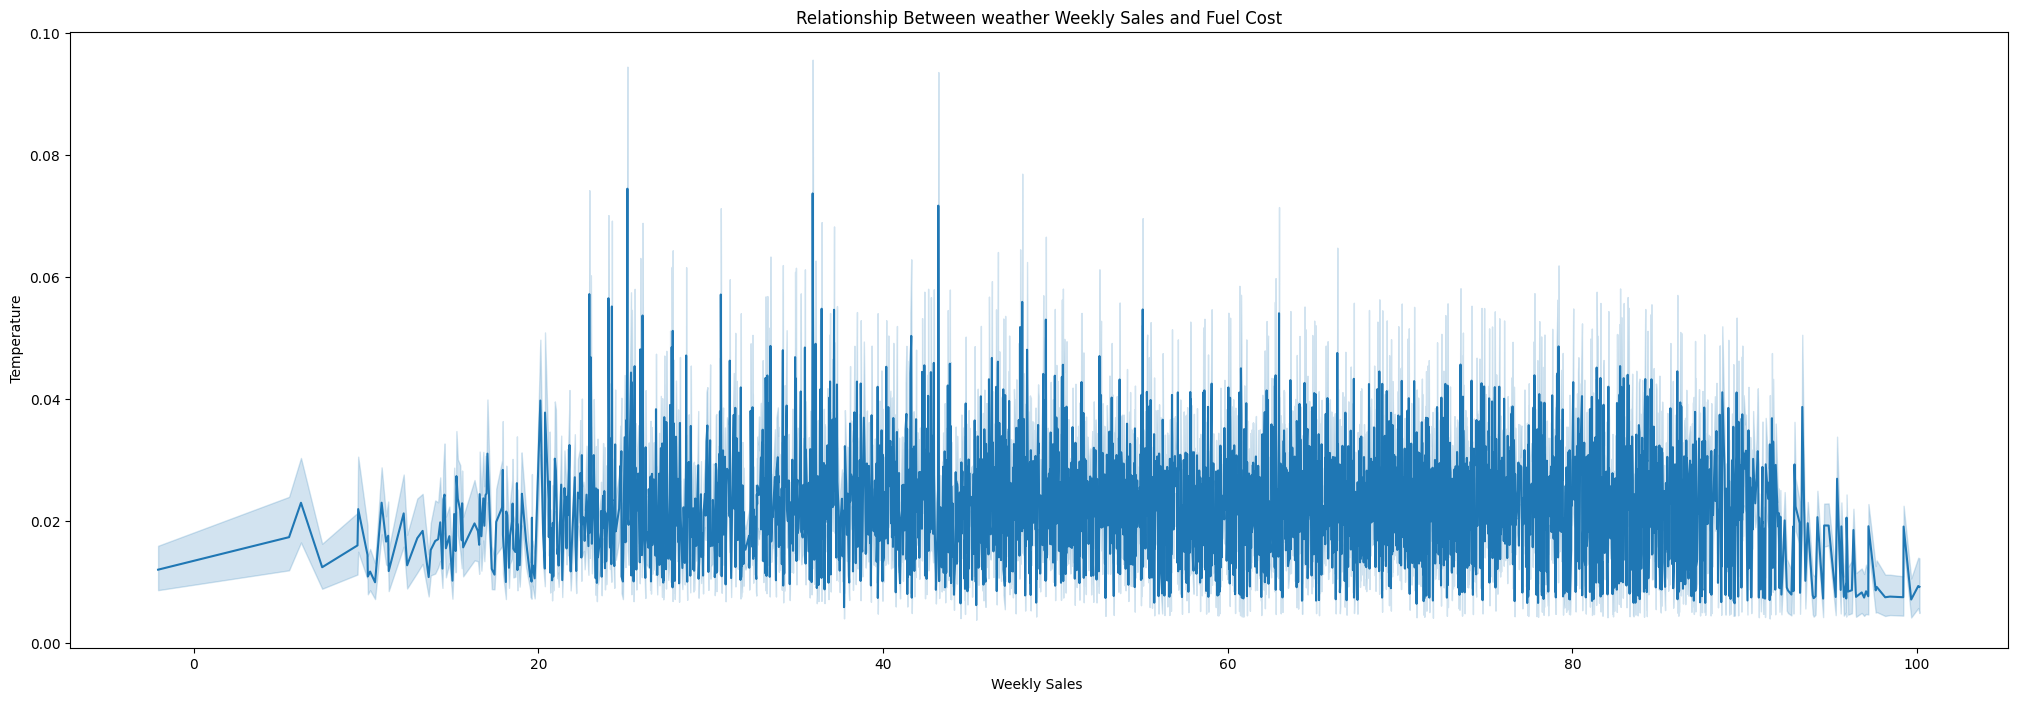

In [ ]:
y22 = data['Weekly_Sales']
x22=data['Temperature']
plt.figure(figsize=(25,8))
# Create a line plot of the relationship between fuel cost and y
line = sns.lineplot(x = x22 , y= y22, data = data)



# Add labels and title
plt.title('Relationship Between weather Weekly Sales and Fuel Cost')
plt.xlabel('Weekly Sales ')
plt.ylabel(' Temperature')



# Show the chart
plt.show()

8.Make a line chart to show the relationship between the cost of fuel and weather weekly sales.

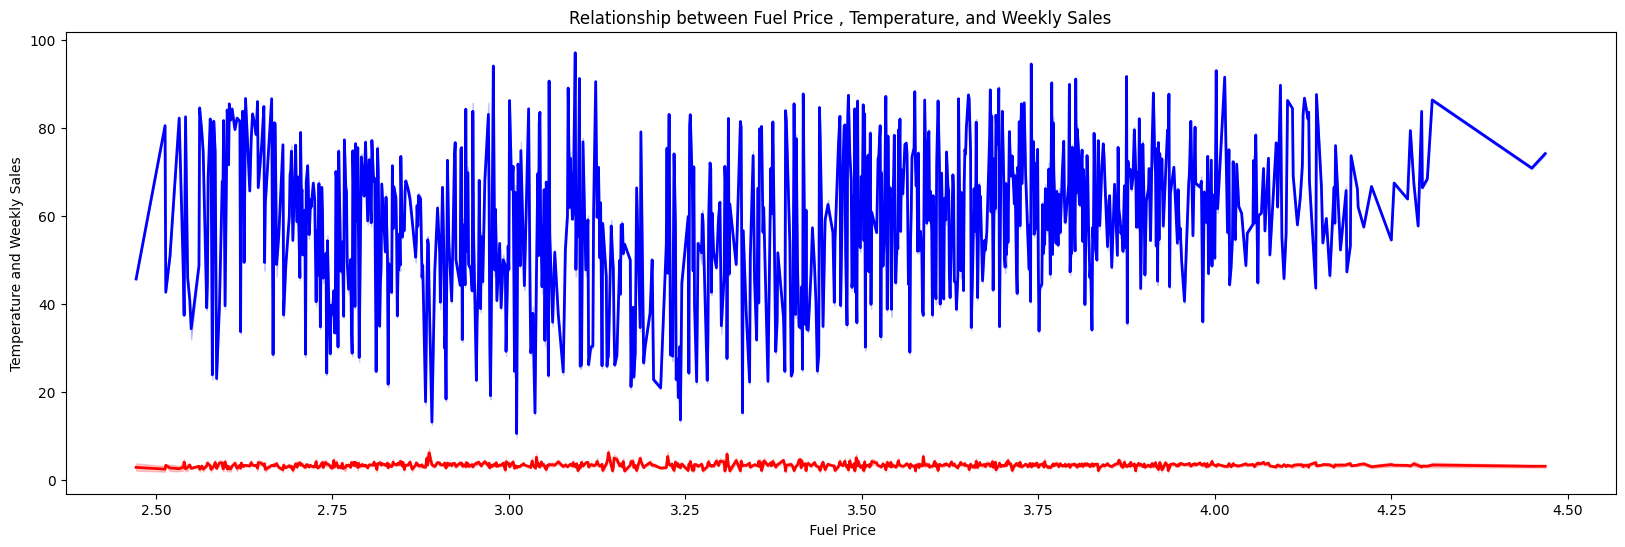

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


#   figure and axes
fig, ax = plt.subplots(figsize=(20, 6))




# line= Temperature vs. Weekly_Sales
line = sns.lineplot(data=df,x='Fuel_Price' , y='Weekly_Sales', color='red', linewidth=2, ax=ax)

# line: Fuel_Price vs. Weekly_Sales
line = sns.lineplot(data=df, x='Fuel_Price', y='Temperature', color='blue', linewidth=2, ax=ax)

# x-axis label, y-axis label, and title
ax.set_xlabel(' Fuel Price')
ax.set_ylabel('Temperature and Weekly Sales')
ax.set_title('Relationship between Fuel Price , Temperature, and Weekly Sales')
#line.set_xlim(1, 100,5)  # Set x-axis limits

# show plot
plt.show()

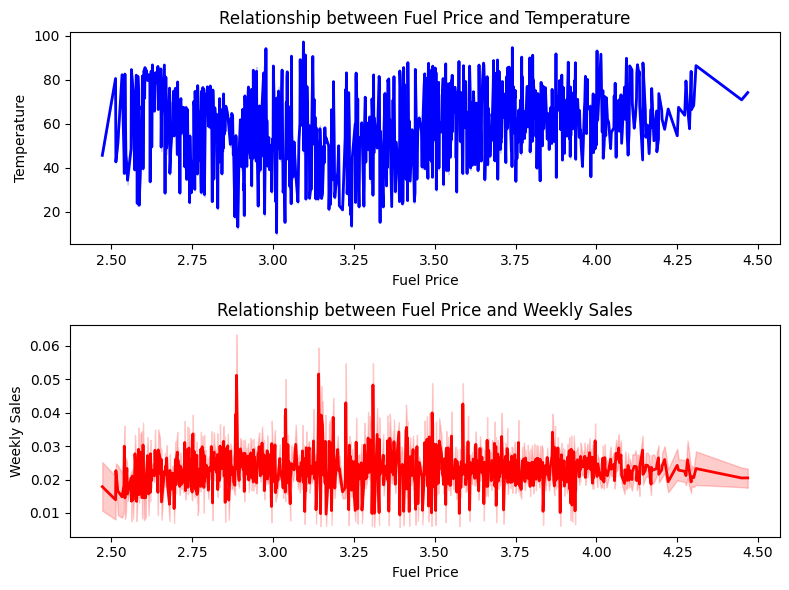

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create  two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot  Fuel_Price & Temperature
sns.lineplot(data=data, x='Fuel_Price', y='Temperature', color='blue', linewidth=2, ax=ax1)
ax1.set_xlabel('Fuel Price')
ax1.set_ylabel('Temperature')
ax1.set_title('Relationship between Fuel Price and Temperature')

# Plot  Fuel_Price & Weekly_Sales
sns.lineplot(data=data, x='Fuel_Price', y='Weekly_Sales', color='red', linewidth=2, ax=ax2)
ax2.set_xlabel('Fuel Price')
ax2.set_ylabel('Weekly Sales')
ax2.set_title('Relationship between Fuel Price and Weekly Sales')


plt.tight_layout()  # make spacing between subplots

# show the plot
plt.show()

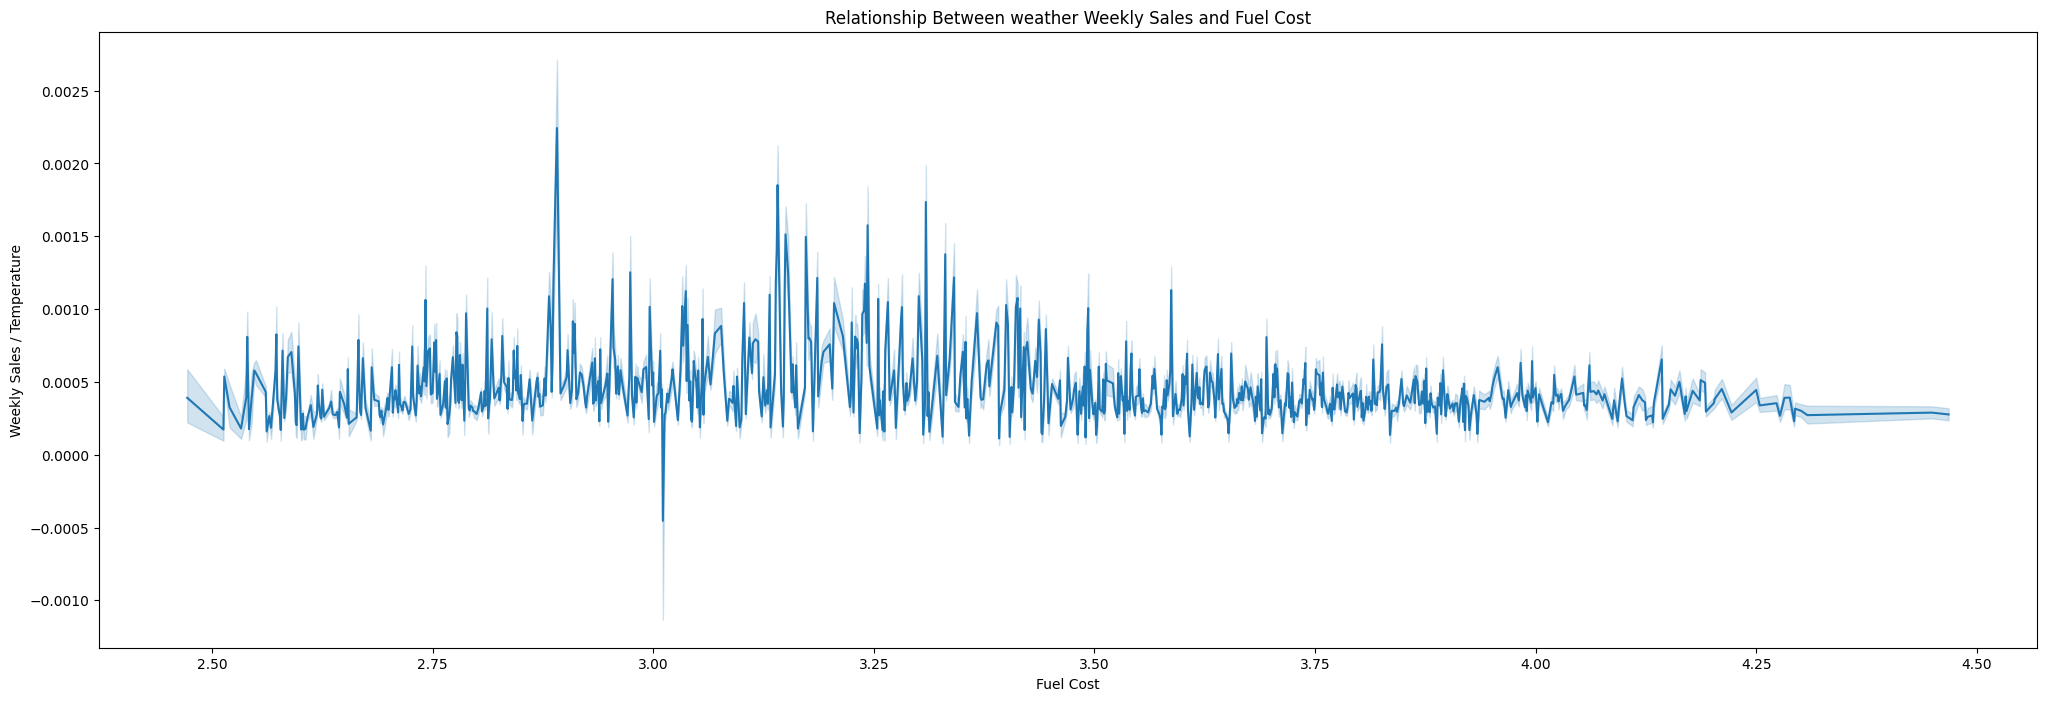

In [ ]:
y22 = data['Weekly_Sales'] /data['Temperature']

plt.figure(figsize=(25,8))
# Create a line plot of the relationship between fuel cost and y
sns.lineplot(x='Fuel_Price', y=y22, data=data)

# Add labels and title
plt.title('Relationship Between weather Weekly Sales and Fuel Cost')
plt.xlabel('Fuel Cost')
plt.ylabel('Weekly Sales / Temperature')

# Show the chart
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix # performance measurement 
from sklearn.metrics import accuracy_score # calculate accuracy
from decimal import Decimal

 ## Start Modeling



In [ ]:
x = data.drop(['Weekly_Sales','Temperature_Category'], axis=1)
y = data['Weekly_Sales']
display(x)
display(y)
#print (x.shape)

,Store,Category,Date,Holiday,Temperature,Fuel_Price
0,1,1,0,0,42.31,2.572
1,1,2,0,0,42.31,2.572
2,1,3,0,0,42.31,2.572
3,1,4,0,0,42.31,2.572
4,1,5,0,0,42.31,2.572
...,...,...,...,...,...,...
420207,45,93,142,0,58.85,3.882
420208,45,94,142,0,58.85,3.882
420209,45,95,142,0,58.85,3.882
420210,45,97,142,0,58.85,3.882


0         0.035961
1         0.073013
2         0.019824
3         0.057645
4         0.046500
            ...   
420207    0.003589
420208    0.007507
420209    0.080822
420210    0.009836
420211    0.001554
Name: Weekly_Sales, Length: 420212, dtype: float64

In [ ]:
# split my data to train and test 
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size =0.8)
#random_state=21

##DecisionTreeRegressor()

In [ ]:
model1 = DecisionTreeRegressor()
model1.fit(x_train,y_train)
pred1 = model1.predict(x_test)
score1 = model1.score(x_test,y_test)

print("Score1 = :",score1)

Score1 = : 0.9106823094166481


##RandomForestRegressor()

In [ ]:

model2 = RandomForestRegressor()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
#print(pred2)
score2 = model2.score(x_test,y_test)
print("Score2 = :",score2)

Score2 = : 0.9506281628984361


## Compare Accuracy(in percentages)

In [ ]:
#function to calculate Accuracy 
def calculate(score1, score2):
    percentage_1 = score1 * 100
    percentage_2 = score2 * 100
    return [(first, round(percentage_1)), (second, round(percentage_2))]
first = 'DecisionTreeRegressor'
second = 'RandomForestRegressor'
percentages = calculate(score1, score2)
print(percentages)

[('DecisionTreeRegressor', 91), ('RandomForestRegressor', 95)]


##using absolute_error and squared_error

In [ ]:
#calc mean_absolute_error in model1
# src : https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/
absolute_error = mean_absolute_error(y_test, pred1)
print("Absolute Error for DecisionTreeRegressor :", absolute_error)
                                                                  
#calc mean_squared_error in model1
mse = mean_squared_error(y_test, pred1)
# to convert value 8.332511188969208e-05 to 0.00008332511188969208 by multiply it by 10^-5
convert="{:.15f}".format(mse) #src :https://www.scaler.com/topics/python-scientific-notation/
print("Mean Squared Error for DecisionTreeRegressor :", convert)

Absolute Error for DecisionTreeRegressor : 0.0033480380262907177
Mean Squared Error for DecisionTreeRegressor : 0.000098209522402


In [ ]:
#calc mean_absolute_error in model2
absolute_error = mean_absolute_error(y_test, pred2)
print("Absolute Error for RandomForestRegressor :", absolute_error)

#calc mean_squared_error in model2
mse = mean_squared_error(y_test, pred2)
convert="{:.15f}".format(mse)
print("Mean Squared Error for RandomForestRegressor :", convert)

Absolute Error for RandomForestRegressor : 0.002650791934124589
Mean Squared Error for RandomForestRegressor : 0.000052947336195
